In [2]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils
from scipy import io
import numpy as np
from sklearn.cross_validation import train_test_split
import string
import cv2
import os
import sys

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

/home/ertadm/PycharmProjects/tryponet2/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import progressbar

def load_folder(folder):
    bar = progressbar.ProgressBar()
    images = []
    i = 0
    for file in bar(os.listdir(folder)):
        image = cv2.imread(os.path.join(folder, file))
        if(image is not None):
            image = cv2.resize(image, (resolution_x, resolution_y), interpolation=cv2.INTER_LINEAR)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
    return np.array(images)

In [7]:
fobia_folder = "/home/ert/Pobrane/rips_old/trypophobic/train"
normal_folder = "/home/ert/Pobrane/rips_old/data_train/reddit_sub_pics"
fobia_folder_val = "/home/ert/Pobrane/rips_old/trypophobic/valid"
normal_folder_val = "/home/ert/Pobrane/rips_old/data_valid/reddit_sub_pics"
resolution_x = 250
resolution_y = 250
fobia_images = load_folder(fobia_folder) /255.
normal_images = load_folder(normal_folder) /255.
fobia_images_val = load_folder(fobia_folder_val) /255.
normal_images_val = load_folder(normal_folder_val) /255.

FileNotFoundError: [Errno 2] No such file or directory: '/home/ert/Pobrane/rips_old/trypophobic/train'

In [5]:
def image_to_X_Y(fobia_images, normal_images):
    X_train = [] 
    Y_train = [] # 1,0 -> fobia | 0,1 -> normal
    for img in fobia_images:
        X_train.append(img)
        Y_train.append([1,0])
    for img in normal_images:
        X_train.append(img)
        Y_train.append([0,1])
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    return X_train, Y_train

X_train, Y_train = image_to_X_Y(fobia_images, normal_images)
X_test, Y_test = image_to_X_Y(fobia_images_val, normal_images_val)

NameError: name 'fobia_images' is not defined

In [5]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, border_mode='same',
          input_shape=(resolution_x, resolution_y, 3)))
#model.add(Convolution2D(8, 3, 3, border_mode='same'))
#model.add(Convolution2D(16, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(50, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(50, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(80, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(80, 3, 3, border_mode='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Convolution2D(128, 1, 1, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(128, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(128, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#for i in range(1):
#    model.add(Dense(128))
#    model.add(Activation('relu'))
#    #model.add(Dropout(0.1))
#for i in range(1):
#    model.add(Dense(32))
#    model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

      OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

          Input   #####   (250, 250, 3)
  Convolution2D    \|/  -------------------       224     0.2%
                  #####   (250, 250, 8)
  Convolution2D    \|/  -------------------      2336     1.8%
           relu   #####   (250, 250, 32)
   MaxPooling2D   YYYYY -------------------         0     0.0%
                  #####   (125, 125, 32)
  Convolution2D    \|/  -------------------     14450    10.8%
           relu   #####   (125, 125, 50)
  Convolution2D    \|/  -------------------     22550    16.9%
           relu   #####   (125, 125, 50)
   MaxPooling2D   YYYYY -------------------         0     0.0%
                  #####   (62, 62, 50)
  Convolution2D    \|/  -------------------     36080    27.0%
           relu   #####   (62, 62, 80)
  Convolution2D    \|/  -------------------     57680    43.2%
           relu   #####   (62, 62, 80)
GlobalAveragePooling2D   ????? -------------------         0     0

In [13]:
history = model.fit(X_train, Y_train,
                    nb_epoch=50,
                    batch_size=32,
                    validation_data=(X_test, Y_test))

Train on 1440 samples, validate on 290 samples
Epoch 1/50
1440/1440 [==============================] - 96s - loss: 0.3547 - acc: 0.8549 - val_loss: 0.3885 - val_acc: 0.8172

KeyboardInterrupt: 

In [10]:
#model.save("model_simple_85p_wyciete")

In [40]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x.transpose((2, 0, 1))
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((2, 1, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def draw_layer_conv(layer,model=model, filter_index=0):
    first_layer = model.layers[0]
    # this is a placeholder tensor that will contain our generated images
    input_img = first_layer.input
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer.output
    loss = K.mean(layer_output[:, filter_index, :, :])
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])
    
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, resolution_x, resolution_y, 3)) * 20 + 128.
    # run gradient ascent for 20 steps
    for i in range(50):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * 10
        
    img = input_img_data[0]
    img = deprocess_image(img)
    return img

def draw_layer_dense(layer, model=model, filter_index=0):
    first_layer = model.layers[0]
    # this is a placeholder tensor that will contain our generated images
    input_img = first_layer.input
    # build a loss function that maximizes the activation
    layer_output = layer.output
    loss = K.mean(layer_output)
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])
    
    # we start from a gray image with some noise
    input_img_data = np.random.random((1, resolution_x, resolution_y, 3)) * 20 + 128.
    # run gradient ascent for 20 steps
    for i in range(100):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * 0.5
        
    img = input_img_data[0]
    img = deprocess_image(img)
    return img

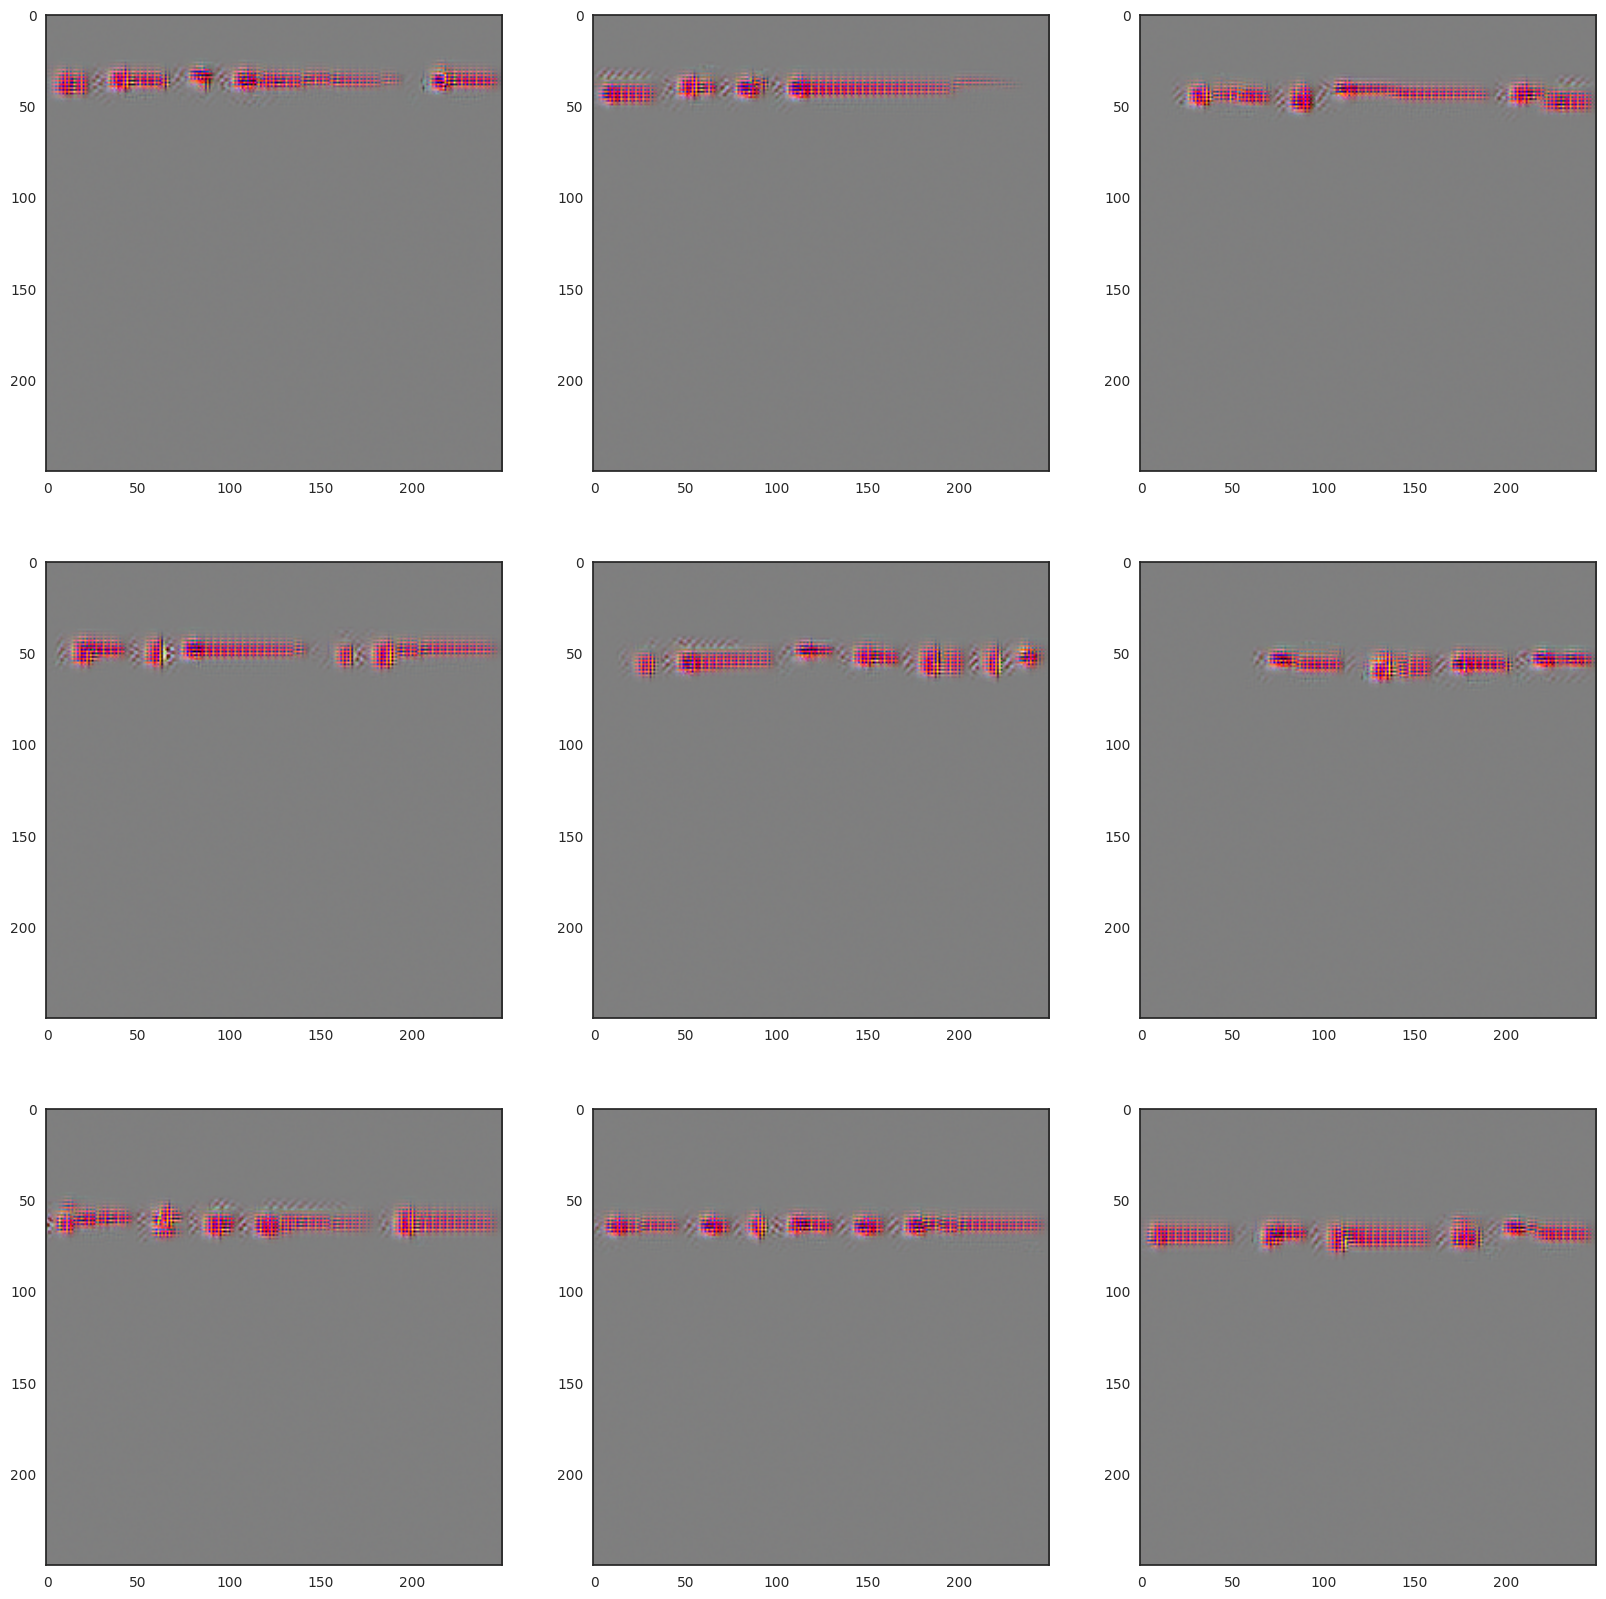

In [26]:
import matplotlib.pyplot as plt
#print(model.layers[13].shape)
plt.figure(figsize=(20,20))
for i in range(9,18):
    plt.subplot(3,3,(i%9)+1)
    plt.imshow(draw_layer_conv(model.layers[11],i))

In [17]:
len(model.layers)

16

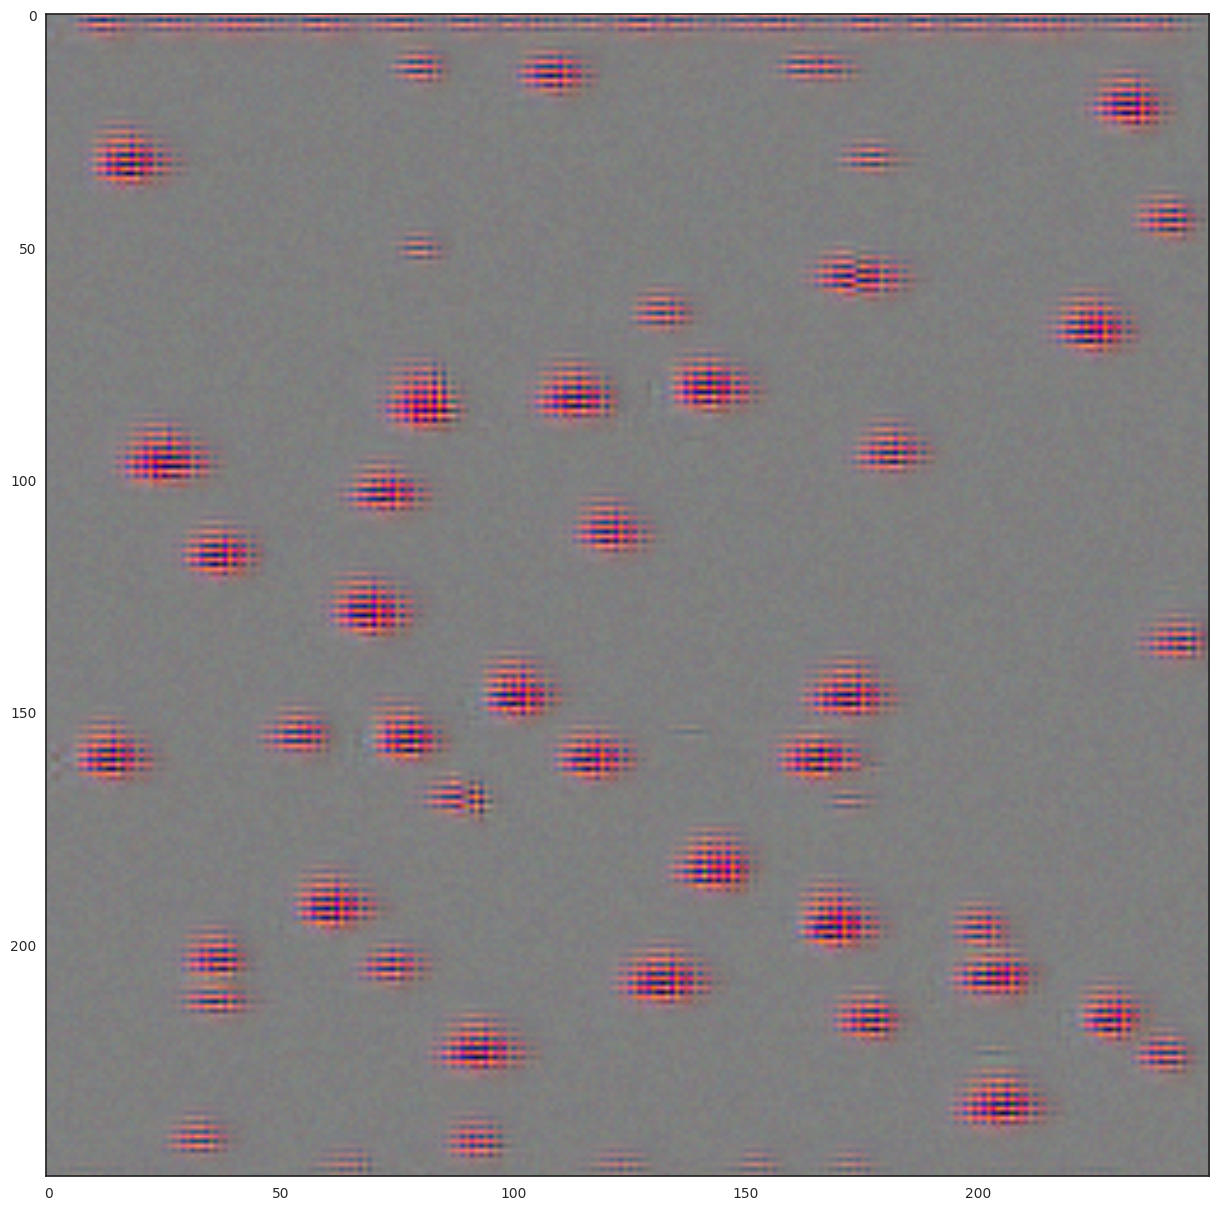

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(draw_layer_dense(model.layers[13]))

In [ ]:

model = load_model("model_simple_85p_wyciete")
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
from quiver_engine import server
server.launch(model2,input_folder="/home/ert/Pobrane/rips/data_valid/reddit_sub_trypophobia/")

Starting webserver from: /home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/quiver_engine


::1 - - [2017-01-19 22:37:06] "GET / HTTP/1.1" 200 802 0.015767
::1 - - [2017-01-19 22:37:12] "GET /model HTTP/1.1" 200 10318 0.019681
::1 - - [2017-01-19 22:37:12] "GET /inputs HTTP/1.1" 200 5650 0.003682
::1 - - [2017-01-19 22:38:42] "GET /layer/convolution2d_30/5huoew-9ead379813714a469a2bb41e51c91560.jpg HTTP/1.1" 200 2502 2.713046


Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


[2017-01-19 22:38:44,560] ERROR in app: Exception on /predict/5huoew-9ead379813714a469a2bb41e51c91560.jpg [GET]
Traceback (most recent call last):
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask/app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask_cors/extension.py", line 161, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask/app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask/_compat.py", line 33, in reraise
    raise value
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:38:50] "GET /predict/5o9zgw-this-buttery-english-muffin-photo-u1.jpg HTTP/1.1" 500 444 0.064240
::1 - - [2017-01-19 22:38:50] "GET /layer/convolution2d_30/5o9zgw-this-buttery-english-muffin-photo-u1.jpg HTTP/1.1" 200 2630 0.229968
::1 - - [2017-01-19 22:38:50] "GET /temp-file/convolution2d_30_0_5o9zgw-this-buttery-english-muffin-photo-u1.jpg.png HTTP/1.1" 200 1122 0.001741
::1 - - [2017-01-19 22:38:50] "GET /temp-file/convolution2d_30_1_5o9zgw-this-buttery-english-muffin-photo-u1.jpg.png HTTP/1.1" 200 1092 0.001766
::1 - - [2017-01-19 22:38:50] "GET /temp-file/convolution2d_30_2_5o9zgw-this-buttery-english-muffin-photo-u1.jpg.png HTTP/1.1" 200 1146 0.001849
::1 - - [2017-01-19 22:38:50] "GET /temp-file/convolution2d_30_3_5o9zgw-this-buttery-english-muffin-photo-u1.jpg.png HTTP/1.1" 200 1141 0.001698
::1 - - [2017-01-19 22:38:50] "GET /temp-file/convolution2d_30_4_5o9zgw-this-buttery-english-muffin-photo-u1.jpg.png HTTP/1.1" 200 1115 0.001789
::1 - - [2017-01-19 2

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:38:54] "GET /predict/5eg9ni-afk1ugpmxbzx.jpg HTTP/1.1" 500 444 0.387702
::1 - - [2017-01-19 22:38:55] "GET /layer/convolution2d_30/5eg9ni-afk1ugpmxbzx.jpg HTTP/1.1" 200 1862 0.479633
::1 - - [2017-01-19 22:38:55] "GET /temp-file/convolution2d_30_0_5eg9ni-afk1ugpmxbzx.jpg.png HTTP/1.1" 200 1012 0.001631
::1 - - [2017-01-19 22:38:55] "GET /temp-file/convolution2d_30_5_5eg9ni-afk1ugpmxbzx.jpg.png HTTP/1.1" 200 1038 0.001743
::1 - - [2017-01-19 22:38:55] "GET /temp-file/convolution2d_30_4_5eg9ni-afk1ugpmxbzx.jpg.png HTTP/1.1" 200 1018 0.001625
::1 - - [2017-01-19 22:38:55] "GET /temp-file/convolution2d_30_3_5eg9ni-afk1ugpmxbzx.jpg.png HTTP/1.1" 200 1020 0.001608
::1 - - [2017-01-19 22:38:55] "GET /temp-file/convolution2d_30_2_5eg9ni-afk1ugpmxbzx.jpg.png HTTP/1.1" 200 1038 0.001633
::1 - - [2017-01-19 22:38:55] "GET /temp-file/convolution2d_30_1_5eg9ni-afk1ugpmxbzx.jpg.png HTTP/1.1" 200 1040 0.007016
::1 - - [2017-01-19 22:38:55] "GET /temp-file/convolution2d_30_6_5eg

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:39:13] "GET /predict/5e7sqb-9d295ab488ca447c84bc97c3945c7c48.jpg HTTP/1.1" 500 444 0.134118
[2017-01-19 22:39:13,503] ERROR in app: Exception on /layer/globalaveragepooling2d_3/5e7sqb-9d295ab488ca447c84bc97c3945c7c48.jpg [GET]
Traceback (most recent call last):
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask/app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask_cors/extension.py", line 161, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5/site-packages/flask/app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/ert/.conda/envs/tensorflow/lib/python3.5

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:39:17] "GET /predict/5h26yg-TspzfEh.jpg HTTP/1.1" 500 444 0.449003
::1 - - [2017-01-19 22:39:18] "GET /layer/activation_28/5h26yg-TspzfEh.jpg HTTP/1.1" 200 1606 0.540237
::1 - - [2017-01-19 22:39:18] "GET /temp-file/activation_28_0_5h26yg-TspzfEh.jpg.png HTTP/1.1" 200 372 0.001742
::1 - - [2017-01-19 22:39:18] "GET /temp-file/activation_28_1_5h26yg-TspzfEh.jpg.png HTTP/1.1" 200 1141 0.001854
::1 - - [2017-01-19 22:39:18] "GET /temp-file/activation_28_2_5h26yg-TspzfEh.jpg.png HTTP/1.1" 200 372 0.001829
::1 - - [2017-01-19 22:39:18] "GET /temp-file/activation_28_3_5h26yg-TspzfEh.jpg.png HTTP/1.1" 200 372 0.001773
::1 - - [2017-01-19 22:39:18] "GET /temp-file/activation_28_4_5h26yg-TspzfEh.jpg.png HTTP/1.1" 200 372 0.001741
::1 - - [2017-01-19 22:39:18] "GET /temp-file/activation_28_5_5h26yg-TspzfEh.jpg.png HTTP/1.1" 200 372 0.001693
::1 - - [2017-01-19 22:39:18] "GET /temp-file/activation_28_6_5h26yg-TspzfEh.jpg.png HTTP/1.1" 200 371 0.001643
::1 - - [2017-01-19 22

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:39:21] "GET /predict/5hs1bq-R4l8bHU.jpg HTTP/1.1" 500 444 0.132736
::1 - - [2017-01-19 22:39:21] "GET /layer/convolution2d_29/5hs1bq-R4l8bHU.jpg HTTP/1.1" 200 3270 0.204290
::1 - - [2017-01-19 22:39:21] "GET /temp-file/convolution2d_29_0_5hs1bq-R4l8bHU.jpg.png HTTP/1.1" 200 1112 0.001061
::1 - - [2017-01-19 22:39:21] "GET /temp-file/convolution2d_29_1_5hs1bq-R4l8bHU.jpg.png HTTP/1.1" 200 1125 0.001678
::1 - - [2017-01-19 22:39:21] "GET /temp-file/convolution2d_29_3_5hs1bq-R4l8bHU.jpg.png HTTP/1.1" 200 1152 0.001675
::1 - - [2017-01-19 22:39:21] "GET /temp-file/convolution2d_29_2_5hs1bq-R4l8bHU.jpg.png HTTP/1.1" 200 1091 0.001612
::1 - - [2017-01-19 22:39:21] "GET /temp-file/convolution2d_29_4_5hs1bq-R4l8bHU.jpg.png HTTP/1.1" 200 1150 0.001657
::1 - - [2017-01-19 22:39:21] "GET /temp-file/convolution2d_29_6_5hs1bq-R4l8bHU.jpg.png HTTP/1.1" 200 1170 0.001685
::1 - - [2017-01-19 22:39:21] "GET /temp-file/convolution2d_29_5_5hs1bq-R4l8bHU.jpg.png HTTP/1.1" 200 1142 0

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:39:32] "GET /predict/5gq5jz-mNQ6Xtp.jpg HTTP/1.1" 500 444 0.411089
::1 - - [2017-01-19 22:39:32] "GET /layer/convolution2d_30/5gq5jz-mNQ6Xtp.jpg HTTP/1.1" 200 1702 0.455546
::1 - - [2017-01-19 22:39:33] "GET /temp-file/convolution2d_30_0_5gq5jz-mNQ6Xtp.jpg.png HTTP/1.1" 200 1077 0.001955
::1 - - [2017-01-19 22:39:33] "GET /temp-file/convolution2d_30_1_5gq5jz-mNQ6Xtp.jpg.png HTTP/1.1" 200 1007 0.003389
::1 - - [2017-01-19 22:39:33] "GET /temp-file/convolution2d_30_2_5gq5jz-mNQ6Xtp.jpg.png HTTP/1.1" 200 1058 0.001676
::1 - - [2017-01-19 22:39:33] "GET /temp-file/convolution2d_30_3_5gq5jz-mNQ6Xtp.jpg.png HTTP/1.1" 200 1074 0.001622
::1 - - [2017-01-19 22:39:33] "GET /temp-file/convolution2d_30_4_5gq5jz-mNQ6Xtp.jpg.png HTTP/1.1" 200 1066 0.001677
::1 - - [2017-01-19 22:39:33] "GET /temp-file/convolution2d_30_5_5gq5jz-mNQ6Xtp.jpg.png HTTP/1.1" 200 1069 0.001684
::1 - - [2017-01-19 22:39:33] "GET /temp-file/convolution2d_30_6_5gq5jz-mNQ6Xtp.jpg.png HTTP/1.1" 200 1086 0

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:39:57] "GET /predict/58ymqc-E9osU20h.jpg HTTP/1.1" 500 444 0.039625
::1 - - [2017-01-19 22:39:57] "GET /layer/convolution2d_30/58ymqc-E9osU20h.jpg HTTP/1.1" 200 1734 0.207927
::1 - - [2017-01-19 22:39:58] "GET /temp-file/convolution2d_30_0_58ymqc-E9osU20h.jpg.png HTTP/1.1" 200 956 0.003351
::1 - - [2017-01-19 22:39:58] "GET /temp-file/convolution2d_30_1_58ymqc-E9osU20h.jpg.png HTTP/1.1" 200 953 0.002860
::1 - - [2017-01-19 22:39:58] "GET /temp-file/convolution2d_30_2_58ymqc-E9osU20h.jpg.png HTTP/1.1" 200 963 0.002023
::1 - - [2017-01-19 22:39:58] "GET /temp-file/convolution2d_30_3_58ymqc-E9osU20h.jpg.png HTTP/1.1" 200 966 0.001655
::1 - - [2017-01-19 22:39:58] "GET /temp-file/convolution2d_30_4_58ymqc-E9osU20h.jpg.png HTTP/1.1" 200 949 0.001689
::1 - - [2017-01-19 22:39:58] "GET /temp-file/convolution2d_30_6_58ymqc-E9osU20h.jpg.png HTTP/1.1" 200 963 0.002179
::1 - - [2017-01-19 22:39:58] "GET /temp-file/convolution2d_30_5_58ymqc-E9osU20h.jpg.png HTTP/1.1" 200 954

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:40:03] "GET /predict/5a0o4c-WqPUosc.jpg HTTP/1.1" 500 444 0.278449
::1 - - [2017-01-19 22:40:03] "GET /layer/convolution2d_30/5a0o4c-WqPUosc.jpg HTTP/1.1" 200 1702 0.335782
::1 - - [2017-01-19 22:40:03] "GET /temp-file/convolution2d_30_0_5a0o4c-WqPUosc.jpg.png HTTP/1.1" 200 1089 0.001612
::1 - - [2017-01-19 22:40:03] "GET /temp-file/convolution2d_30_1_5a0o4c-WqPUosc.jpg.png HTTP/1.1" 200 1088 0.001629
::1 - - [2017-01-19 22:40:03] "GET /temp-file/convolution2d_30_2_5a0o4c-WqPUosc.jpg.png HTTP/1.1" 200 1109 0.001748
::1 - - [2017-01-19 22:40:03] "GET /temp-file/convolution2d_30_3_5a0o4c-WqPUosc.jpg.png HTTP/1.1" 200 1096 0.001771
::1 - - [2017-01-19 22:40:03] "GET /temp-file/convolution2d_30_4_5a0o4c-WqPUosc.jpg.png HTTP/1.1" 200 1085 0.002655
::1 - - [2017-01-19 22:40:03] "GET /temp-file/convolution2d_30_5_5a0o4c-WqPUosc.jpg.png HTTP/1.1" 200 1095 0.001727
::1 - - [2017-01-19 22:40:03] "GET /temp-file/convolution2d_30_6_5a0o4c-WqPUosc.jpg.png HTTP/1.1" 200 1086 0

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-01-19 22:40:06] "GET /predict/5o9zgw-this-buttery-english-muffin-photo-u1.jpg HTTP/1.1" 500 444 0.059088
::1 - - [2017-01-19 22:40:07] "GET /layer/convolution2d_30/5o9zgw-this-buttery-english-muffin-photo-u1.jpg HTTP/1.1" 200 2630 0.228698
KeyboardInterrupt
Thu Jan 19 22:40:14 2017


KeyboardInterrupt: 

In [1]:
from keras.models import load_model
model2 = load_model("model_92p_wyciete")

Using TensorFlow backend.


OSError: Unable to open file (unable to open file: name = 'model_92p_wyciete', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [31]:
len(model2.layers)

27

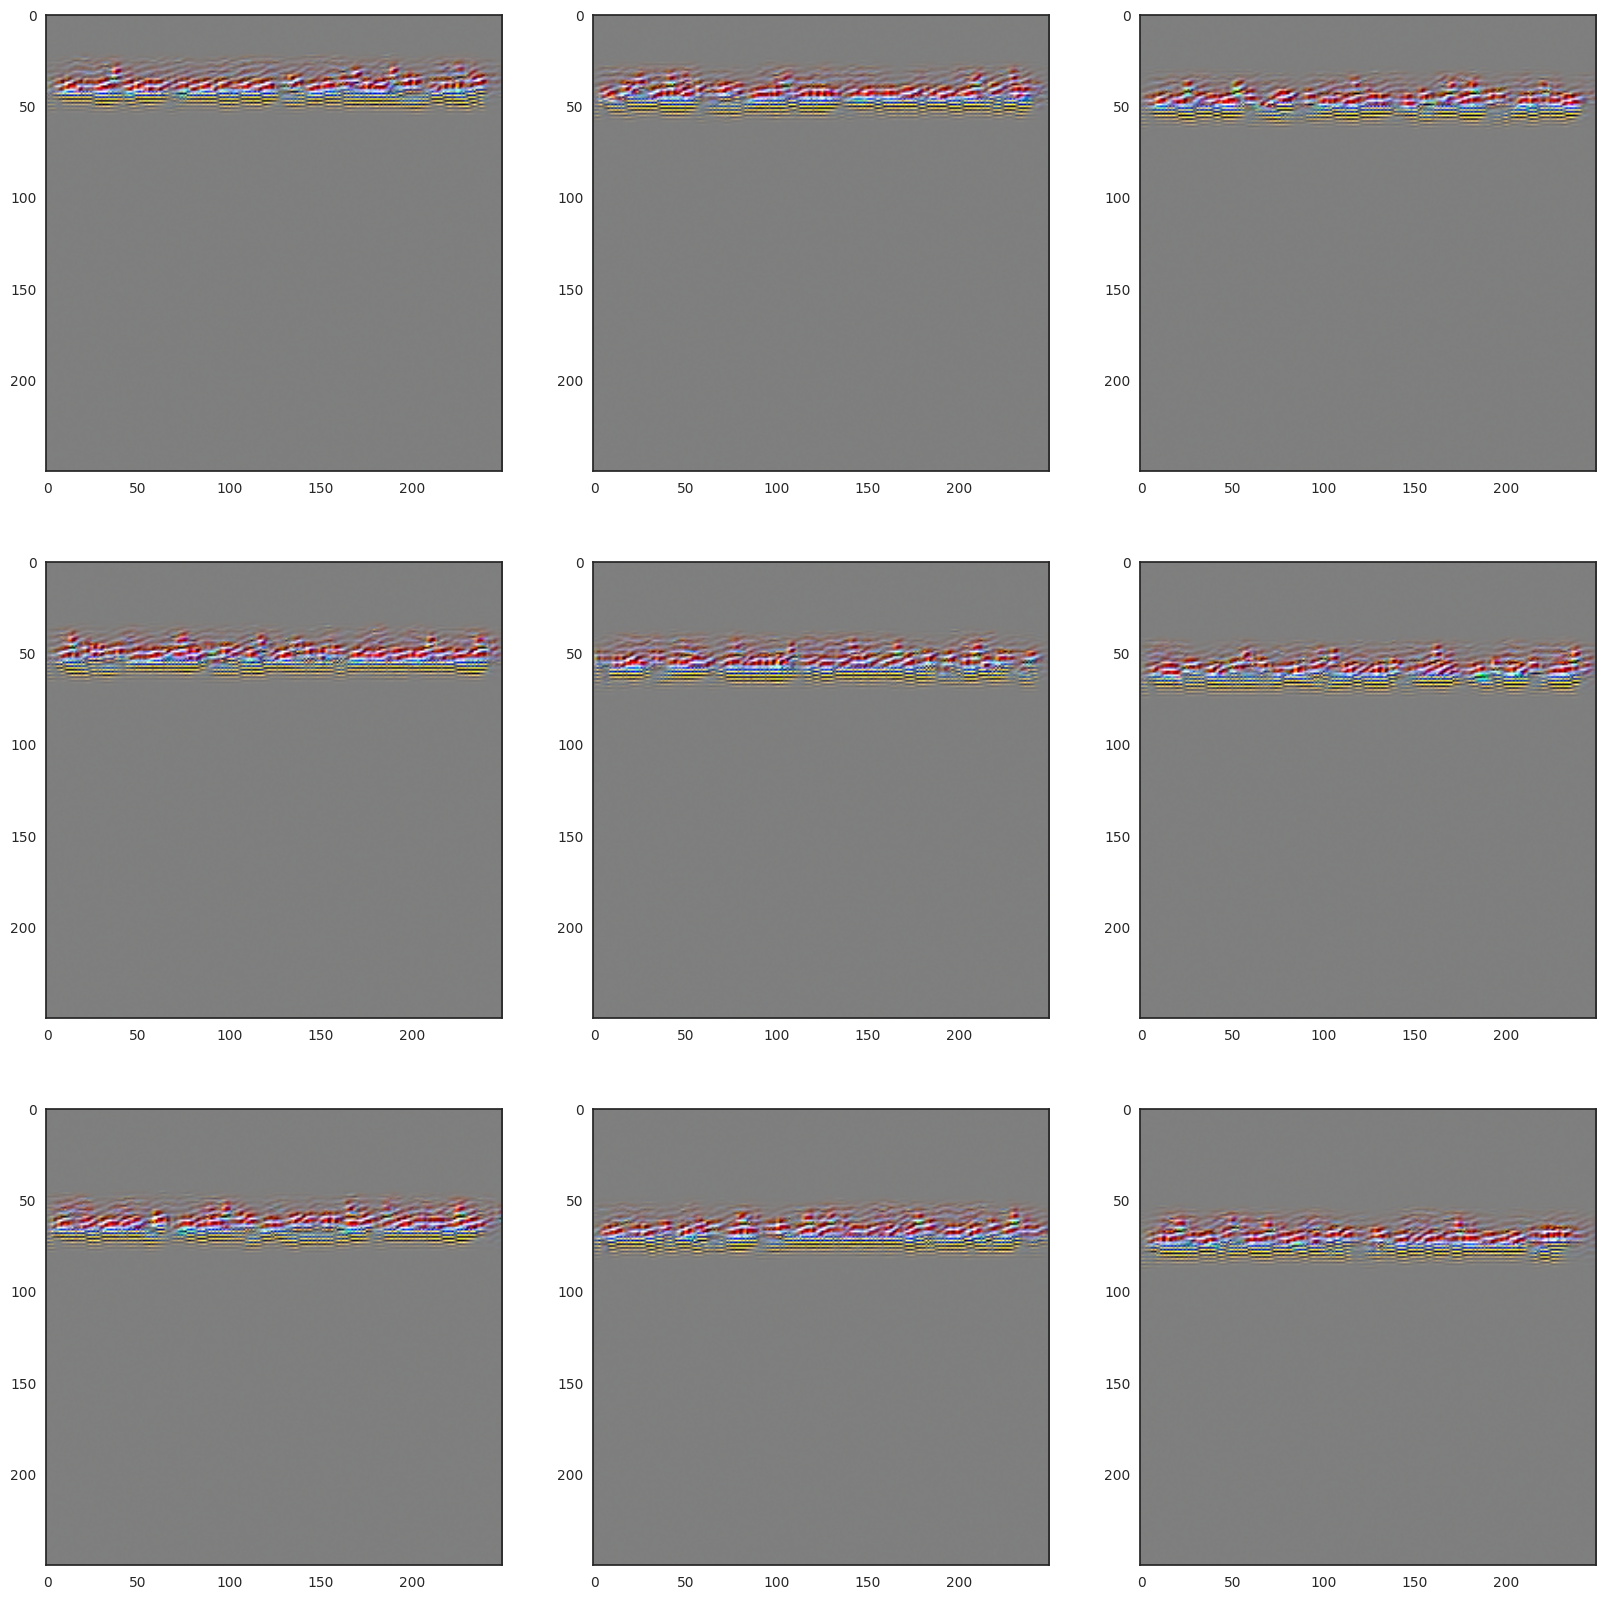

In [50]:
plt.figure(figsize=(20,20))
for i in range(9,18):
    plt.subplot(3,3,(i%9)+1)
    plt.imshow(draw_layer_conv(model2.layers[15],model2,i))

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(draw_layer_dense(model.layers[13]))

NameError: name 'plt' is not defined

In [1]:
draw_layer_dense(model.layers[13])

NameError: name 'draw_layer_dense' is not defined